<a href="https://colab.research.google.com/github/naav3/ItML_Project_2_Students/blob/main/final_project_nnimages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=2e2b3bb4ad0399a53c7b67949a7f360a49f2a89118a374f6ee756d09168a6685
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [2]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install wget
  #!pip install split-folders
  import wget
  import zipfile
  #import split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.layers import Dense, Flatten, Normalization, Dropout, Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom, BatchNormalization, Activation, InputLayer
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import utils
import os
import matplotlib.pyplot as plt
import os
import glob
from pathlib import Path
import os, warnings
from tensorflow.keras.utils import image_dataset_from_directory

In [4]:
import PIL
if IN_COLAB:
    !pip install --ignore-installed Pillow==9.0.0
    !pip install -U git+https://github.com/keisen/tf-keras-vis.git@4a90becb02ed3d44825300fcb807dd58157787ba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 27.9 MB/s eta 0:00:00


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/keisen/tf-keras-vis.git (to revision 4a90becb02ed3d44825300fcb807dd58157787ba) to /tmp/pip-req-build-g5j4jkhm
  Running command git clone --filter=blob:none --quiet https://github.com/keisen/tf-keras-vis.git /tmp/pip-req-build-g5j4jkhm
  Running command git rev-parse -q --verify 'sha^4a90becb02ed3d44825300fcb807dd58157787ba'
  Running command git fetch -q https://github.com/keisen/tf-keras-vis.git 4a90becb02ed3d44825300fcb807dd58157787ba
  Running command git checkout -q 4a90becb02ed3d44825300fcb807dd58157787ba
  Resolved https://github.com/keisen/tf-keras-vis.git to commit 4a90becb02ed3d44825300fcb807dd58157787ba
  Preparing metadata (setup.py) ... done
  Created wheel for tf-keras-vis: filename=tf_keras_vis-0.7.0-py3-none-any.whl size=52254 sha256=b7f0430366bc1a88d9b851d039000fc1c8d3f521bfa469134614c79f603abc9e
  Stored in directory: /root/.cache/pip/wheels/

# Project 2 - Veggie Classification

For this assignment you'll need to classify some images of vegetables. 

## Parts

Please do two separate classifications:
<ol>
<li> First, create a model from scratch. 
<li> Use transfer learning to use a pretrained model of your choice, adapted to this data. 
</ol>

There won't be an explicit evaluation of accuracy, but you should take some steps to make each model as accurate as you reasonably can, any tuning option is fair game. Along with that, please structure it into a notebook that is well structured and clear that explains what you did and found. Think about:
<ul>
<li> Sections and headings. 
<li> A description of the approach taken (e.g. what did you do to determine size, tune, evaluate, etc...)
<li> Visualization of some important things such as a confusion matrix and maybe some images. 
<li> Results, mainly focused on the scoring of the test data. 
</ul>

The descriptions and explainations should highlight the choices you made and why you made them. Figure up to about a page or so worth of text total, explain what happened but don't write an essay. 

## Deliverables

Please sumbmit a link to your github, where everyhting is fully run with all the outputs showing on the page. As well, in the notebook please add some kind of switch controlled by a variable that will control if the notebook runs to train the model or to load the model in from weights - so I can download it and click run all, it will load the saved weights, and predict.
### Dataset

The code in the start of this notebook will download and unzip the dataset, and there is also a simple example of creating datasets. You can change the dataset bit to use a different approach if you'd like. The data is already split into train, validation, and test sets. Please treat the separate test set as the final test set, and don't use it for any training or validation. Each folder name is its own label.

### Evaluation

Marking will be based on the following:
<ul>
<li> Models are cretaed, tuned, and effective at classifying the data: 40%
<li> Descriptions and explanations of the approach taken: 20%
<li> Code is well structured and clear: 20%
</ul>

Overall the marking is pretty simple and direct, walk through the process of predicting the veggies, explain what you did, and show the results. If you do that, it'll get a good mark.

### Tips

Some hints that may be helpful to keep in mind:
<ul>
<li> The data is pretty large, so you'll want to use datasets rather than load everything into memory. The Keras docs have a few examples of different ways to load image data, our examples showed image generators and the image from directory datasets.  
<li> Be careful of batch size, you may hit the colab limits. 
<li> You'll want to use checkpoints so you can let it train and pick up where you left off.
<li> When developing, using a smaller dataset sample is a good idea. These weights could also be saved and loaded to jump start training on the full data. 
<li>



In [5]:
# Helper to plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_acc(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
#switch
train_mode = True

### Download and Unzip Data

In [7]:
if train_mode:
  def bar_custom(current, total, width=80):
      print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))
  import wget
  import zipfile
  zip_name = "train.zip"

  url = "https://jrssbcrsefilesnait.blob.core.windows.net/3950data1/vegetable_image_dataset.zip"

  if not os.path.exists(zip_name):
     wget.download(url, zip_name, bar=bar_custom)

  with zipfile.ZipFile(zip_name, 'r') as zip_ref:
     zip_ref.extractall()

# Generate Datasets - you can change this if desired
# ENSURE FILE PATHS MATCH CORRECTLY
if train_mode:
   IMAGE_SIZE=(224,224)
   train_dir='Vegetable Images/train'
   val_dir='Vegetable Images/validation'
   batch_size = 16

# Load training data
   train_ds = image_dataset_from_directory(
      train_dir,
      label_mode='categorical',
      image_size = IMAGE_SIZE,
      batch_size=batch_size)

   val_ds = image_dataset_from_directory(
     val_dir,
     label_mode='categorical',
     image_size = IMAGE_SIZE,
     batch_size = batch_size)

Streaming output truncated to the last 5000 lines.
Downloading: 92% [519102464 / 560031432] bytes
Downloading: 92% [519110656 / 560031432] bytes
Downloading: 92% [519118848 / 560031432] bytes
Downloading: 92% [519127040 / 560031432] bytes
Downloading: 92% [519135232 / 560031432] bytes
Downloading: 92% [519143424 / 560031432] bytes
Downloading: 92% [519151616 / 560031432] bytes
Downloading: 92% [519159808 / 560031432] bytes
Downloading: 92% [519168000 / 560031432] bytes
Downloading: 92% [519176192 / 560031432] bytes
Downloading: 92% [519184384 / 560031432] bytes
Downloading: 92% [519192576 / 560031432] bytes
Downloading: 92% [519200768 / 560031432] bytes
Downloading: 92% [519208960 / 560031432] bytes
Downloading: 92% [519217152 / 560031432] bytes
Downloading: 92% [519225344 / 560031432] bytes
Downloading: 92% [519233536 / 560031432] bytes
Downloading: 92% [519241728 / 560031432] bytes
Downloading: 92% [519249920 / 560031432] bytes
Downloading: 92% [519258112 / 560031432] bytes
Downloadi

In [8]:
if train_mode:
   class_names = train_ds.class_names
   print(class_names)

['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


## Data Preparation

In [9]:
if train_mode:
   BUFFER = 150 
   VAL_SPLIT = .2
   EPOCHS = 20
   SEED = 123
   MONITOR="val_accuracy"
   PATIENCE=5
   DELTA=.02
   MODE='max'

if train_mode:
   checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("logs/weights.{epoch:02d}-{val_loss:.2f}.hdf5", 
                                                            monitor='val_accuracy', verbose=2, save_best_only=False, 
                                                            save_weights_only=True, mode='max', save_freq='epoch')
   callback = tf.keras.callbacks.EarlyStopping(monitor=MONITOR, patience=PATIENCE,
                                               restore_best_weights=True, min_delta=DELTA, mode=MODE)

In [10]:
from tensorflow.keras.layers import Rescaling
if train_mode:
   rescale = Rescaling(scale=1./255)


TPAIN = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
train_ds = train_ds.shuffle(buffer_size=BUFFER)
train_ds = train_ds.prefetch(buffer_size=TPAIN)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))
val_ds = val_ds.shuffle(buffer_size=BUFFER)
val_ds = val_ds.prefetch(buffer_size=TPAIN)

#input_shape=IMAGE_SIZE + (3,)
#inputs = keras.Input(shape=input_shape)

## Custom Model Training

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
if train_mode:
  trainAugmenter = ImageDataGenerator(
         rotation_range=20,
         width_shift_range=0.2, 
         rescale=1./255,
         validation_split = 0.25)
  valAugmenter = ImageDataGenerator(
         validation_split = 0.25,
         rescale=1./255 )

# Pull Data to train the augmentation
  fitAugmenter = ImageDataGenerator(
          validation_split = 0.25,
          rescale=1./255)
  #fitAug = fitAugmenter.flow_from_directory(val_dir, seed=33, subset="validation", batch_size=20, class_mode="categorical",)
  #trainAugmenter.fit(fitAug.next()[0])
  augTrain = trainAugmenter.flow_from_directory(train_dir, subset="training", batch_size=32, class_mode="categorical",)
  augVal = valAugmenter.flow_from_directory(val_dir, subset="validation", batch_size=32, class_mode="categorical",)


Found 11250 images belonging to 15 classes.
Found 750 images belonging to 15 classes.


In [12]:

from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import LeakyReLU

if train_mode:
    model = Sequential([
        Conv2D(64, (3, 3), padding='same', input_shape=(224, 224, 3)),
        LeakyReLU(alpha=0.1),  # Use LeakyReLU activation with alpha=0.1
        #BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), padding='same'),
        LeakyReLU(alpha=0.1),  # Use LeakyReLU activation with alpha=0.1
        #BatchNormalization(),
        MaxPooling2D((2, 2)),
        #Flatten(),
        GlobalMaxPooling2D(),
        Dense(64),
        LeakyReLU(alpha=0.1),  # Use LeakyReLU activation with alpha=0.1
        Dropout(0.2),
        Dense(15, activation='softmax')
    ])
    model.summary()
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 256)     147712    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 112, 112, 256)     0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 256)      0         
 2D)                                                    

Epoch 1/15
352/352 [==============================] - ETA: 0s - loss: 1.9036 - accuracy: 0.3600
Epoch 1: saving model to logs/weights.01-1.30.hdf5
352/352 [==============================] - 212s 551ms/step - loss: 1.9036 - accuracy: 0.3600 - val_loss: 1.2958 - val_accuracy: 0.5920
Epoch 2/15
352/352 [==============================] - ETA: 0s - loss: 1.1386 - accuracy: 0.6268
Epoch 2: saving model to logs/weights.02-0.90.hdf5
352/352 [==============================] - 187s 530ms/step - loss: 1.1386 - accuracy: 0.6268 - val_loss: 0.8953 - val_accuracy: 0.7213
Epoch 3/15
352/352 [==============================] - ETA: 0s - loss: 0.8045 - accuracy: 0.7414
Epoch 3: saving model to logs/weights.03-0.58.hdf5
352/352 [==============================] - 184s 523ms/step - loss: 0.8045 - accuracy: 0.7414 - val_loss: 0.5845 - val_accuracy: 0.8133
Epoch 4/15
352/352 [==============================] - ETA: 0s - loss: 0.6149 - accuracy: 0.8060
Epoch 4: saving model to logs/weights.04-0.44.hdf5
352/352

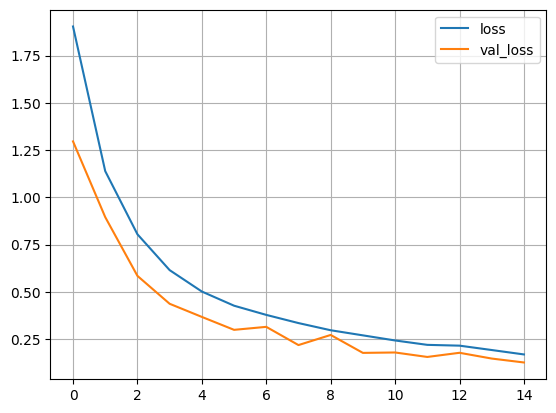

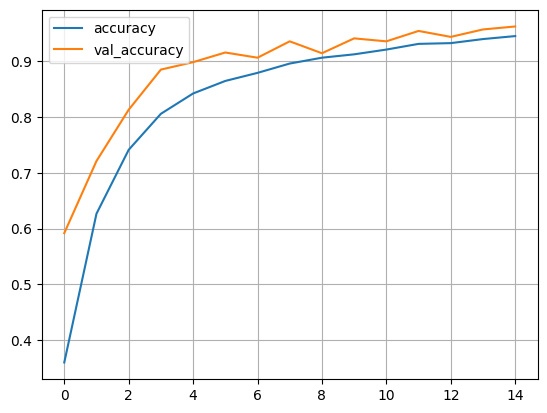

In [13]:
if train_mode:
   log_m =model.fit(augTrain,
            epochs=15,
            verbose=1,
            validation_data=augVal,
            callbacks=[callback,checkpoint_callback])
   plot_loss(log_m)
   plot_acc(log_m)
            

## model 2(with more layers,changed optimizers,regularization)

In [14]:
#if train_mode:
    #checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint("logs1/weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                                                            # monitor='val_accuracy', verbose=2, 
                                                             #save_best_only=False, save_weights_only=True, 
                                                             #mode='max', save_freq='epoch')
    #model1 = tf.keras.Sequential([
        #tf.keras.layers.Conv2D(64, (3,3), padding="same", input_shape=(224, 224, 3)),
        #tf.keras.layers.ReLU(),
        #tf.keras.layers.MaxPooling2D(),
        #tf.keras.layers.Conv2D(128, (3,3), padding="same"),
        #tf.keras.layers.LeakyReLU(),
        #tf.keras.layers.MaxPooling2D(),
        #tf.keras.layers.Conv2D(256, (3,3), padding="same"),
        #tf.keras.layers.ReLU(),
        #tf.keras.layers.MaxPooling2D(),
        #tf.keras.layers.Dropout(.2),
        #tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(64, kernel_regularizer="l1_l2"),
        #tf.keras.layers.ReLU(),
        #tf.keras.layers.Dropout(.2),
        #tf.keras.layers.Dense(50, kernel_regularizer="l1_l2"),
        #tf.keras.layers.ReLU(),
        #tf.keras.layers.Dense(15, activation="softmax")])
    

#if train_mode:
    #lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
    #optimizer=tf.optimizers.Adam(learning_rate=0.001)
    #model1.compile(
        #optimizer=optimizer,
        #optimizer="rmsprop",
        #loss="categorical_crossentropy",
        #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        #metrics=keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        #metrics=['accuracy'],
        #)
    #model1.summary()


In [15]:
#if train_mode:
   #log_m2 = model1.fit(
       #train_ds,
       #validation_data=val_ds,
       #epochs=15,
       #batch_size=150,
       #callbacks=[callback,checkpoint_callback1,lr_scheduler])
   #plot_loss(log_m2)
   #plot_acc(log_m2)
   #model1.save('model1')

## Transfer Learning Model


In [16]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input
from keras.models import Model
from keras.applications.vgg16 import preprocess_input

In [17]:
#transfer learning model
#from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
## Loading VGG16 model
if train_mode:    
   base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
   base_model.trainable = False ## Not trainable weights

# Add Dense Stuff
   flatten_layer = GlobalMaxPooling2D()
   dense_layer_1 = Dense(15, activation='relu', kernel_regularizer='l1_l2', bias_regularizer='l1_l2')
   drop_layer_1 = Dropout(.2)
   #dense_layer_2 = Dense(64, activation='relu', kernel_regularizer='l2', bias_regularizer='l2')
   prediction_layer = Dense(15,activation='softmax')

   #modeltransfer = Sequential([
        #base_model,
        #flatten_layer,
        #dense_layer_1,
        #drop_layer_1,
        #dense_layer_2,
        #prediction_layer])
   modeltransfer = Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    BatchNormalization(),
    drop_layer_1,
    #dense_layer_2,
    BatchNormalization(),
    prediction_layer])

modeltransfer.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_max_pooling2d_1 (Glo  (None, 512)              0         
 balMaxPooling2D)                                                
                                                                 
 dense_2 (Dense)             (None, 15)                7695      
                                                                 
 batch_normalization (BatchN  (None, 15)               60        
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                       

In [18]:
## Data Augmentation 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
if train_mode:
  trainAugmenter = ImageDataGenerator(
         rotation_range=20,
         width_shift_range=0.2, 
         rescale=1./255,
         validation_split = 0.25)
  valAugmenter = ImageDataGenerator(
         validation_split = 0.25,
         rescale=1./255 )

# Pull Data to train the augmentation
  fitAugmenter = ImageDataGenerator(
          validation_split = 0.25,
          rescale=1./255)
  #fitAug = fitAugmenter.flow_from_directory(val_dir, seed=33, subset="validation", batch_size=20, class_mode="categorical",)
  #trainAugmenter.fit(fitAug.next()[0])
  augTrain = trainAugmenter.flow_from_directory(train_dir, subset="training", batch_size=40, class_mode="categorical",)
  augVal = valAugmenter.flow_from_directory(val_dir, subset="validation", batch_size=40, class_mode="categorical",)


Found 11250 images belonging to 15 classes.
Found 750 images belonging to 15 classes.


In [19]:
#compliing
if train_mode:
  optimizer = keras.optimizers.Adam(learning_rate=0.01)
  modeltransfer.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  stopping_callback = EarlyStopping(monitor='val_accuracy', patience= 2, restore_best_weights=True, mode="max")
  lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)


Epoch 1/10
282/282 [==============================] - 202s 688ms/step - loss: 2.8871 - accuracy: 0.5600 - val_loss: 6.5142 - val_accuracy: 0.2920 - lr: 0.0100
Epoch 2/10
282/282 [==============================] - 186s 661ms/step - loss: 2.1647 - accuracy: 0.6956 - val_loss: 4.9922 - val_accuracy: 0.2773 - lr: 0.0100
Epoch 3/10
282/282 [==============================] - 187s 663ms/step - loss: 2.2952 - accuracy: 0.6990 - val_loss: 4.1593 - val_accuracy: 0.3853 - lr: 0.0100
Epoch 4/10
282/282 [==============================] - 188s 666ms/step - loss: 2.1265 - accuracy: 0.7044 - val_loss: 11.4681 - val_accuracy: 0.1467 - lr: 0.0100
Epoch 5/10
282/282 [==============================] - 185s 657ms/step - loss: 2.9334 - accuracy: 0.7103 - val_loss: 8.5982 - val_accuracy: 0.2800 - lr: 0.0100


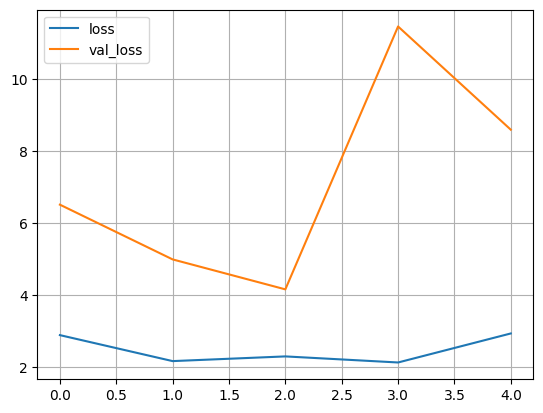

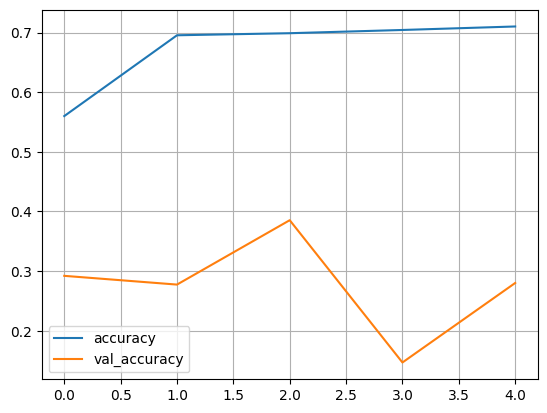

In [20]:
if train_mode:
   log_mtransfer =modeltransfer.fit(augTrain,
            epochs=10,
            verbose=1,
            validation_data=augVal,
            batch_size=100,
            callbacks=[stopping_callback,lr_scheduler])
   plot_loss(log_mtransfer)
   plot_acc(log_mtransfer)
   #modeltransfer.save('Transfermodel')

## Test Best Models and Illustrate Results


In [21]:
test_dir='Vegetable Images/test'
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size = batch_size)

Found 3000 files belonging to 15 classes.


In [22]:
#if train_mode == False:
    #model = keras.models.load_model('model')
    #model = keras.models.load_model('model1')
    #model = keras.models.load_model('Transfermodel')

In [23]:
test_ds = test_ds.map(lambda x, y: (rescale(x), y))
test_ds = test_ds.shuffle(buffer_size=BUFFER)  # Apply rescaling to test data
test_ds= test_ds.prefetch(buffer_size=TPAIN) 

Found 3000 files belonging to 15 classes.
188/188 [==============================] - 8s 27ms/step


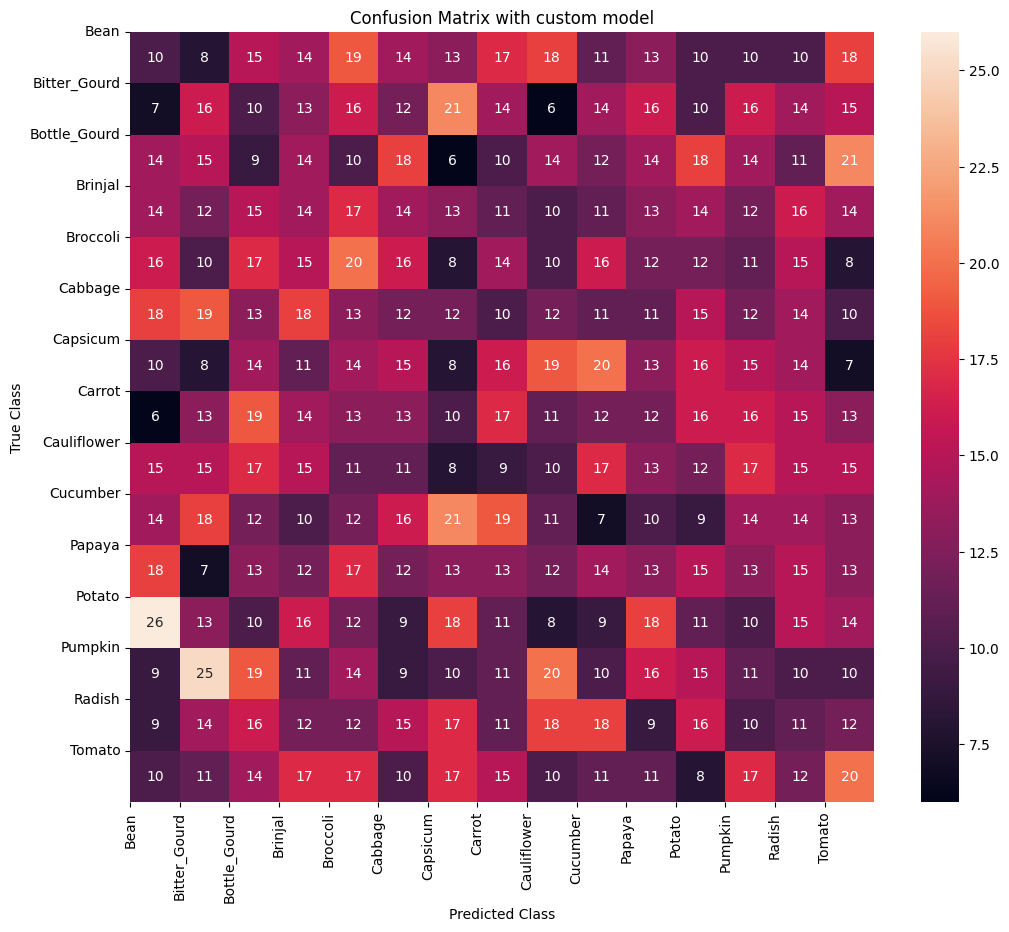

In [24]:
import os
import numpy as np
from sklearn.metrics import classification_report
import tensorflow as tf

test_dir = 'Vegetable Images/test'
label_walk = os.walk(test_dir)
labels = []
for path, directories, files in label_walk:
    for directory in directories:
        labels.append(directory)
labels.sort()
IMAGE_SIZE=(224,224)
batch_size = 16
BUFFER = 150 
SEED = 123
rescale = Rescaling(scale=1./255)
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size = IMAGE_SIZE,
    batch_size = batch_size)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))
test_ds = test_ds.shuffle(buffer_size=BUFFER)  # Apply rescaling to test data
test_ds= test_ds.prefetch(buffer_size=TPAIN) 
# Calculate the total number of samples in the test_ds dataset
#test_ds_samples = tf.data.experimental.cardinality(test_ds).numpy().sum()
#test_steps_per_epoch = np.math.ceil(test_ds_samples / batch_size)

# Make predictions on the test_ds dataset
predictions = model.predict(test_ds)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.concatenate([y for x, y in test_ds], axis=0)  # Assuming test_ds is a tuple of (x, y) pairs
class_labels = labels

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predicted classes and true classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.concatenate([y for x, y in test_ds], axis=0)
true_classes = np.argmax(true_classes, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))
#im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
sns.heatmap(cm, annot=True, fmt="d")
#ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_labels,
       yticklabels=class_labels,
       title='Confusion Matrix with custom model',
       xlabel='Predicted Class',
       ylabel='True Class')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



188/188 [==============================] - 6s 25ms/step


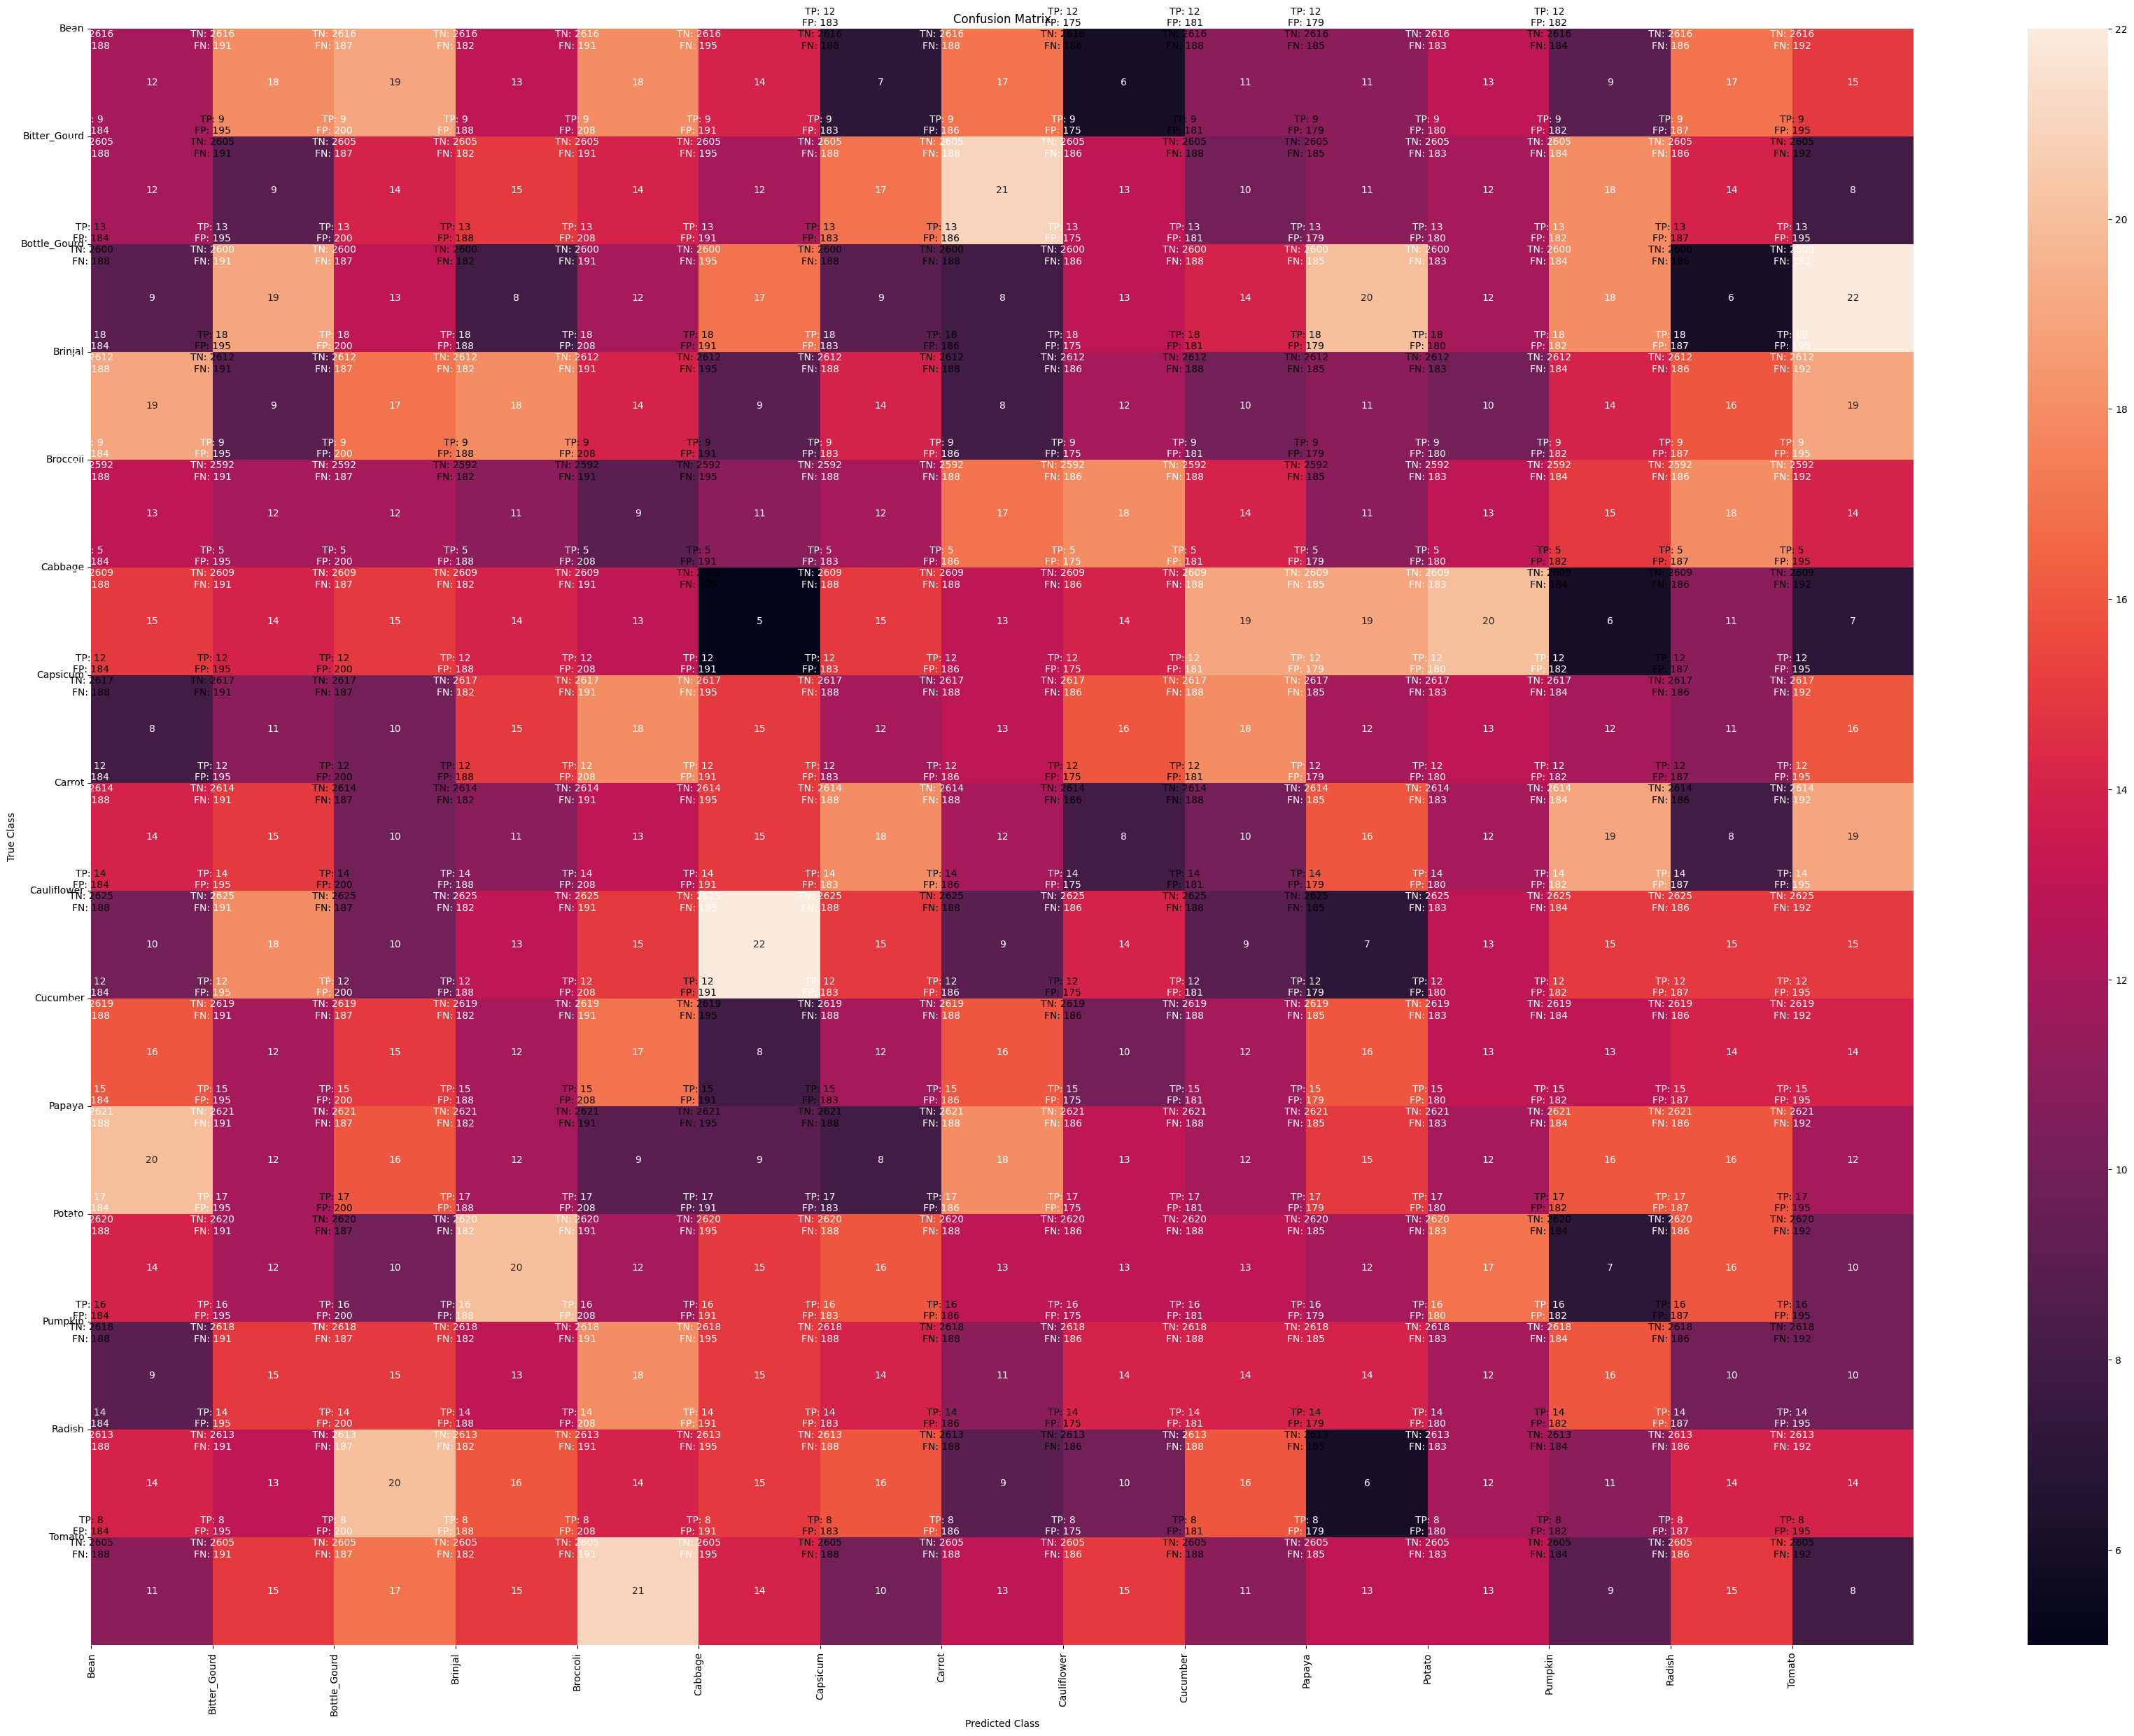

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Make predictions on the test_ds dataset
predictions = model.predict(test_ds)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.concatenate([y for x, y in test_ds], axis=0)  # Assuming test_ds is a tuple of (x, y) pairs
class_labels = labels
# Get predicted classes and true classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.concatenate([y for x, y in test_ds], axis=0)
true_classes = np.argmax(true_classes, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Extract true positives, false positives, true negatives, false negatives
tp = np.diag(cm)
fp = np.sum(cm, axis=0) - tp
fn = np.sum(cm, axis=1) - tp
tn = np.sum(cm) - (tp + fp + fn)

# Plot confusion matrix with additional metrics
fig, ax = plt.subplots(figsize=(42, 30))
#im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
sns.heatmap(cm, annot=True, fmt="d")
#ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_labels,
       yticklabels=class_labels,
       title='Confusion Matrix',
       xlabel='Predicted Class',
       ylabel='True Class')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Add count of true positives, false positives, true negatives, false negatives
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f'TP: {tp[i]:.0f}\nFP: {fp[j]:.0f}\nTN: {tn[i]:.0f}\nFN: {fn[j]:.0f}', ha='center', va='center',
                color='white' if cm[i, j] > thresh else 'black')

plt.show()


188/188 [==============================] - 13s 60ms/step


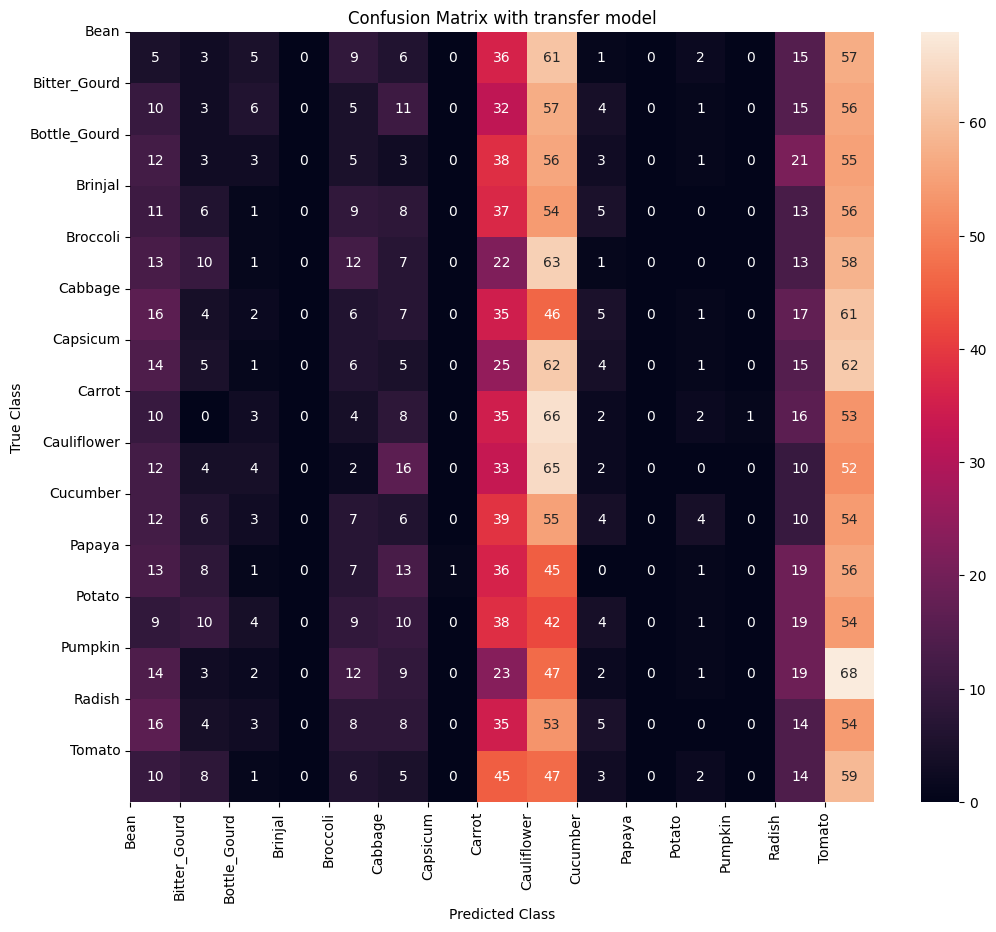

In [47]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Make predictions on the test_ds dataset
predictions = modeltransfer.predict(test_ds)
# Get predicted classes and true classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.concatenate([y for x, y in test_ds], axis=0)
true_classes = np.argmax(true_classes, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(12, 10))
#im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
sns.heatmap(cm, annot=True, fmt="d")
#ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_labels,
       yticklabels=class_labels,
       title='Confusion Matrix with transfer model',
       xlabel='Predicted Class',
       ylabel='True Class')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [37]:
model.save_weights('model_weights.h5')

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
!mv model_weights.h5 /content/model_weights.h5


mv: 'model_weights.h5' and '/content/model_weights.h5' are the same file


In [30]:
from keras.utils import load_img,img_to_array

In [31]:
def image_predictor(img_path):
  img=load_img(img_path,target_size=(224,224,3))
  img_show=load_img(img_path)
  image_to_test=img_to_array(img)
  list_of_images=np.expand_dims(img,axis=0)
  results=model.predict(list_of_images)
  single_result=results[0]
  most_likely_class_index=int(np.argmax(single_result))
  class_likelihood=single_result[most_likely_class_index]
  class_label=labels[most_likely_class_index]
  return img_show,class_likelihood,class_label

##best model

In [ ]:
if not train_mode:
   test_dir = 'Vegetable Images/test'
   label_walk = os.walk(test_dir)
   labels = []
   for path, directories, files in label_walk:
       for directory in directories:
           labels.append(directory)
   labels.sort()
   IMAGE_SIZE=(224,224)
   batch_size = 16
   BUFFER = 150 
   SEED = 123
   rescale = Rescaling(scale=1./255)
   test_ds = image_dataset_from_directory(
              test_dir,
              label_mode='categorical',
              image_size = IMAGE_SIZE,
              batch_size = batch_size)
  test_ds = test_ds.map(lambda x, y: (rescale(x), y))
  test_ds = test_ds.shuffle(buffer_size=BUFFER)  # Apply rescaling to test data
  test_ds= test_ds.prefetch(buffer_size=TPAIN)

In [ ]:
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import LeakyReLU

if  not train_mode :
    modelbest = Sequential([
        Conv2D(64, (3, 3), padding='same', input_shape=(224, 224, 3)),
        LeakyReLU(alpha=0.1),  # Use LeakyReLU activation with alpha=0.1
        #BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), padding='same'),
        LeakyReLU(alpha=0.1),  # Use LeakyReLU activation with alpha=0.1
        #BatchNormalization(),
        MaxPooling2D((2, 2)),
        #Flatten(),
        GlobalMaxPooling2D(),
        Dense(64),
        LeakyReLU(alpha=0.1),  # Use LeakyReLU activation with alpha=0.1
        Dropout(0.2),
        Dense(15, activation='softmax')
    ])
    modelbest.summary()
    # Compile the model
    import os
    import glob
    list_of_files = glob.glob("logs/weights/*.hdf5") 
    latest = max(list_of_files, key=os.path.getctime)
    print(latest)
    modelbest.load_weights(latest)
    modelbest.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam, metrics=['accuracy'])    

In [ ]:
if not train_mode:
  log_mb=modelbest.fit(test_ds,
            epochs=15,
            verbose=1,
            callbacks=[callback,checkpoint_callback])
   plot_loss(log_mb)
   plot_acc(log_mb)

# Summary of steps taken
## Data preparation steps

<li>Rescaling: The Rescaling layer is applied to normalize pixel values of the images by dividing them by 255.0.
<li>Dataset mapping: The train_ds and val_ds datasets are mapped using the lambda function to apply the Rescaling layer to each image in the datasets
<li>Dataset shuffling: The train_ds dataset is shuffled using the shuffle function with a buffer size of BUFFER to introduce randomness and reduce any potential biases in the training process.
<li>Dataset prefetching: The train_ds and val_ds datasets are prefetched using the prefetch function with a buffer size of TPAIN to optimize data loading during training by overlapping data loading with model training.

# subsets 
considered taking subset of data to reduce runtime, but decided to deal with whole data as more training data leads to better results

## Optimization steps and size of customized model
<li> reduced epochs ,led to underfitted model
<li>started with simple model ( 9 layers,optimizer=adam ,activation=relu) tried various values of patience, for smaller values model was stopping too early ,on adding batch normalization reduced accuraccy to 6 only,tried leraning rate scheduler 
<li> added more layers ,changed optimizer to rmsprop,activation to leaky relu, kernel regularization-l2,l1 was tried, batch normalization layers were tried(same pattern was observed), batch size=20,100,500,600(memoryerror) was tried but it takes long time to run,training loss and accuraccy dropped to 1.3,0.89 & validation loss and accuraccy to 1.3 , 0.90
<li>data augmentation to fix spiky validation loss,achieved accuracy upto 95

## transfer learning model steps
<li>using vgg16 model for convolutional part,added dense layers with regularization,tried both loss functions,data augmentation,early stopping,batch normalization,regularization
<li>reduced layers to simplify model
<li>also tried with more layers-complex models but this was overfitting every time

## Results
customised model was choosen as best model,we used less epochs due to memory issues,if we would have resources to go with more epochs ,more accuraccy could have been achieved.